In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [14]:
#accessing the MNIST dataset usign sklearn's built-in function from sklearn's datasets

data = datasets.fetch_openml(
                            'mnist_784',
                            version = 1,
                            return_X_y = True
)

In [15]:
pixel_values, targets = data
targets = targets.astype(int)

In [16]:
print(pixel_values)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
print(pixel_values.shape) #70000 different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points

(70000, 784)


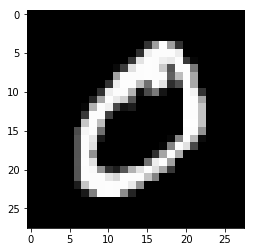

In [18]:
#Visualizing the single image by reshaping it to its original shape

single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [30]:
#t-SNE transformation

tsne = manifold.TSNE(n_components = 2, random_state = 42)

transformed_data = tsne.fit_transform(pixel_values[:3000,:]) 

# The transformed_data,is an array of shape 3000x2 (3000 rows and 2 columns)

In [31]:
transformed_data.shape

(3000, 2)

In [32]:
#Converting transformed data to pandas dataframe

tsne_df = pd.DataFrame( 
np.column_stack((transformed_data, targets[:3000])),
columns = ['x','y','targets']) #x and y are the two components from t-SNE decomposition and targets is the actual number

In [33]:
tsne_df.head()

,x,y,targets
0,-9.742266,-28.548525,5.0
1,-25.476608,-66.111008,0.0
2,-39.992714,32.707321,4.0
3,46.730042,29.864080,1.0
4,-14.279590,30.505270,9.0


In [35]:
tsne_df.loc[:,'targets'] = tsne_df.targets.astype(int)

In [36]:
tsne_df.head()

,x,y,targets
0,-9.742266,-28.548525,5
1,-25.476608,-66.111008,0
2,-39.992714,32.707321,4
3,46.730042,29.864080,1
4,-14.279590,30.505270,9


C:\Users\coolt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


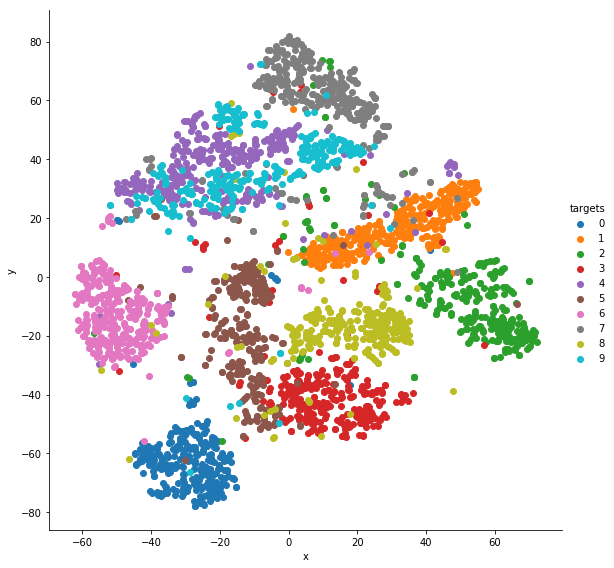

In [38]:
#Plotting the clusters

grid = sns.FacetGrid(tsne_df, hue="targets", size=8)

grid.map(plt.scatter,"x","y").add_legend()